In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time as t

from scipy.integrate import solve_ivp

plt.rcParams.update({'font.size': 12})

----------------
## Binarna reakcija
----------------

In [2]:
df = {
    's': [10, 1, 0.1],
    'Eksaktna rešitev': np.zeros(3),
    'Stacionarni približek': np.zeros(3)
}

### Eksaktna rešitev

In [3]:
# Sistem of diferential equations
def f(t, vec, k, s):
    a, az, b = vec

    # Compute the derivatives
    dadt = -a**2 + k*a*az
    dazdt = a**2 - k*a*az - k*s*az
    dbdt = k*s*az

    return [dadt, dazdt, dbdt]


# Parameters
k = 1000.
s = [10., 1., 0.1]

# Initial values and desired time span
initial_a = 1.
initial_az = 0.
initial_b = 0.
y0 = [initial_a, initial_az, initial_b]

t_initial = 0.
t_final1 = 40.
t_final3 = 100.
num_points = 1000
ts1 = np.linspace(t_initial, t_final1, num_points)
ts3 = np.linspace(t_initial, t_final3, num_points)
t_span1 = (t_initial, t_final1)
t_span3 = (t_initial, t_final3)

# Solve the diferential equations
t1 = t.time()
solution1 = solve_ivp(f, t_span1, y0, t_eval=ts1, method='DOP853', args=(k, s[0]))
t2 = t.time()
df['Eksaktna rešitev'][0] = t2-t1
t1 = t.time()
solution2 = solve_ivp(f, t_span1, y0, t_eval=ts1, method='DOP853', args=(k, s[1]))
t2 = t.time()
df['Eksaktna rešitev'][1] = t2-t1
t1 = t.time()
solution3 = solve_ivp(f, t_span3, y0, t_eval=ts3, method='DOP853', args=(k, s[2]))
t2 = t.time()
df['Eksaktna rešitev'][2] = t2-t1

# The solution is in solution.y
a_solution1, az_solution1, b_solution1 = solution1.y
a_solution2, az_solution2, b_solution2 = solution2.y
a_solution3, az_solution3, b_solution3 = solution3.y

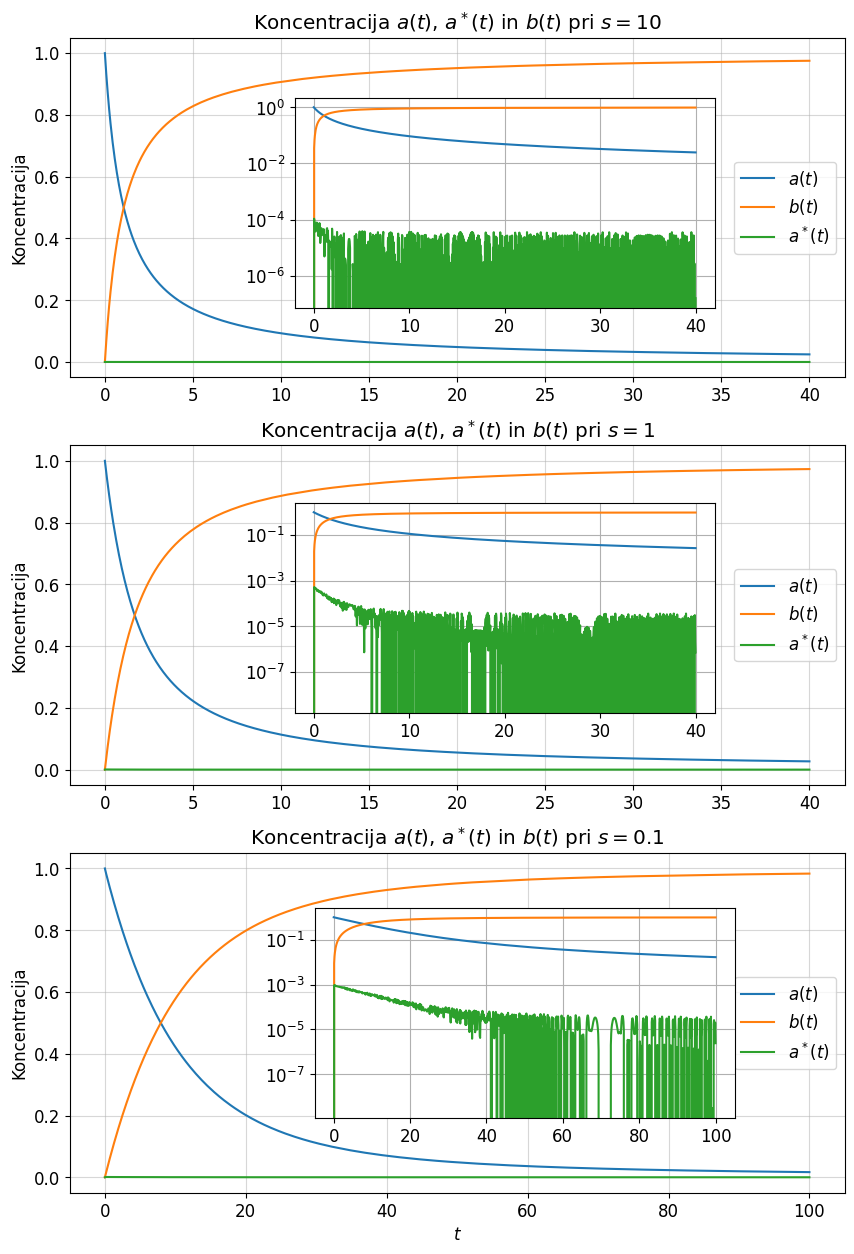

In [4]:
# Plot the solutions
fig = plt.figure(figsize=(10,15))

ax1 = fig.add_subplot(3,1,1)
ax1.grid(alpha=0.5)
ax1.set_title(r'Koncentracija $a(t)$, $a^*(t)$ in $b(t)$ pri $s=10$')
ax1.set_ylabel('Koncentracija')
ax1.plot(ts1, a_solution1, label=r'$a(t)$')
ax1.plot(ts1, b_solution1, label=r'$b(t)$')
ax1.plot(ts1, az_solution1, label=r'$a^*(t)$')
ax1.legend()

ax1_inset = fig.add_axes([0.35, 0.70, 0.42, 0.14])  # Adjust the values as needed
ax1_inset.grid()
ax1_inset.set_yscale('log')
ax1_inset.plot(ts1, a_solution1, label=r'$a(t)$')
ax1_inset.plot(ts1, b_solution1, label=r'$b(t)$')
ax1_inset.plot(ts1, az_solution1, label=r'$a^*(t)$')


ax2 = fig.add_subplot(3,1,2)
ax2.grid(alpha=0.5)
ax2.set_title(r'Koncentracija $a(t)$, $a^*(t)$ in $b(t)$ pri $s=1$')
ax2.set_ylabel('Koncentracija')
ax2.plot(ts1, a_solution2, label=r'$a(t)$')
ax2.plot(ts1, b_solution2, label=r'$b(t)$')
ax2.plot(ts1, az_solution2, label=r'$a^*(t)$')
ax2.legend()

ax2_inset = fig.add_axes([0.35, 0.43, 0.42, 0.14])  # Adjust the values as needed
ax2_inset.grid()
ax2_inset.set_yscale('log')
ax2_inset.plot(ts1, a_solution2, label=r'$a(t)$')
ax2_inset.plot(ts1, b_solution2, label=r'$b(t)$')
ax2_inset.plot(ts1, az_solution2, label=r'$a^*(t)$')


ax3 = fig.add_subplot(3,1,3)
ax3.grid(alpha=0.5)
ax3.set_title(r'Koncentracija $a(t)$, $a^*(t)$ in $b(t)$ pri $s=0.1$')
ax3.set_ylabel('Koncentracija')
ax3.set_xlabel(r'$t$')
ax3.plot(ts3, a_solution3, label=r'$a(t)$')
ax3.plot(ts3, b_solution3, label=r'$b(t)$')
ax3.plot(ts3, az_solution3, label=r'$a^*(t)$')
ax3.legend()

ax3_inset = fig.add_axes([0.37, 0.16, 0.42, 0.14])  # Adjust the values as needed
ax3_inset.grid()
ax3_inset.set_yscale('log')
ax3_inset.plot(ts3, a_solution3, label=r'$a(t)$')
ax3_inset.plot(ts3, b_solution3, label=r'$b(t)$')
ax3_inset.plot(ts3, az_solution3, label=r'$a^*(t)$')

### Stacionarni približek

In [5]:
# Sistem of diferential equations
def f(t, y, k, s):
    a, b = y

    # Compute the derivatives
    dadt = - s * a**2 / (a+s)
    dbdt = s * a**2 / (a+s)

    return [dadt, dbdt]


# Parameters
k = 1000.
s = [10., 1., 0.1]

# Initial values and desired time span
initial_a = 1.
initial_b = 0.
y0 = [initial_a, initial_b]

t_initial = 0.
t_final1 = 40.
t_final3 = 100.
num_points = 1000
ts1 = np.linspace(t_initial, t_final1, num_points)
ts3 = np.linspace(t_initial, t_final3, num_points)
t_span1 = (t_initial, t_final1)
t_span3 = (t_initial, t_final3)

# Solve the diferential equations
t1 = t.time()
solution1 = solve_ivp(f, t_span1, y0, t_eval=ts1, method='DOP853', args=(k, s[0]))
t2 = t.time()
df['Stacionarni približek'][0] = t2-t1
t1 = t.time()
solution2 = solve_ivp(f, t_span1, y0, t_eval=ts1, method='DOP853', args=(k, s[1]))
t2 = t.time()
df['Stacionarni približek'][1] = t2-t1
t1 = t.time()
solution3 = solve_ivp(f, t_span3, y0, t_eval=ts3, method='DOP853', args=(k, s[2]))
t2 = t.time()
df['Stacionarni približek'][2] = t2-t1

# The solution is in solution.y
a_solution_stac1, b_solution_stac1 = solution1.y
a_solution_stac2, b_solution_stac2 = solution2.y
a_solution_stac3, b_solution_stac3 = solution3.y

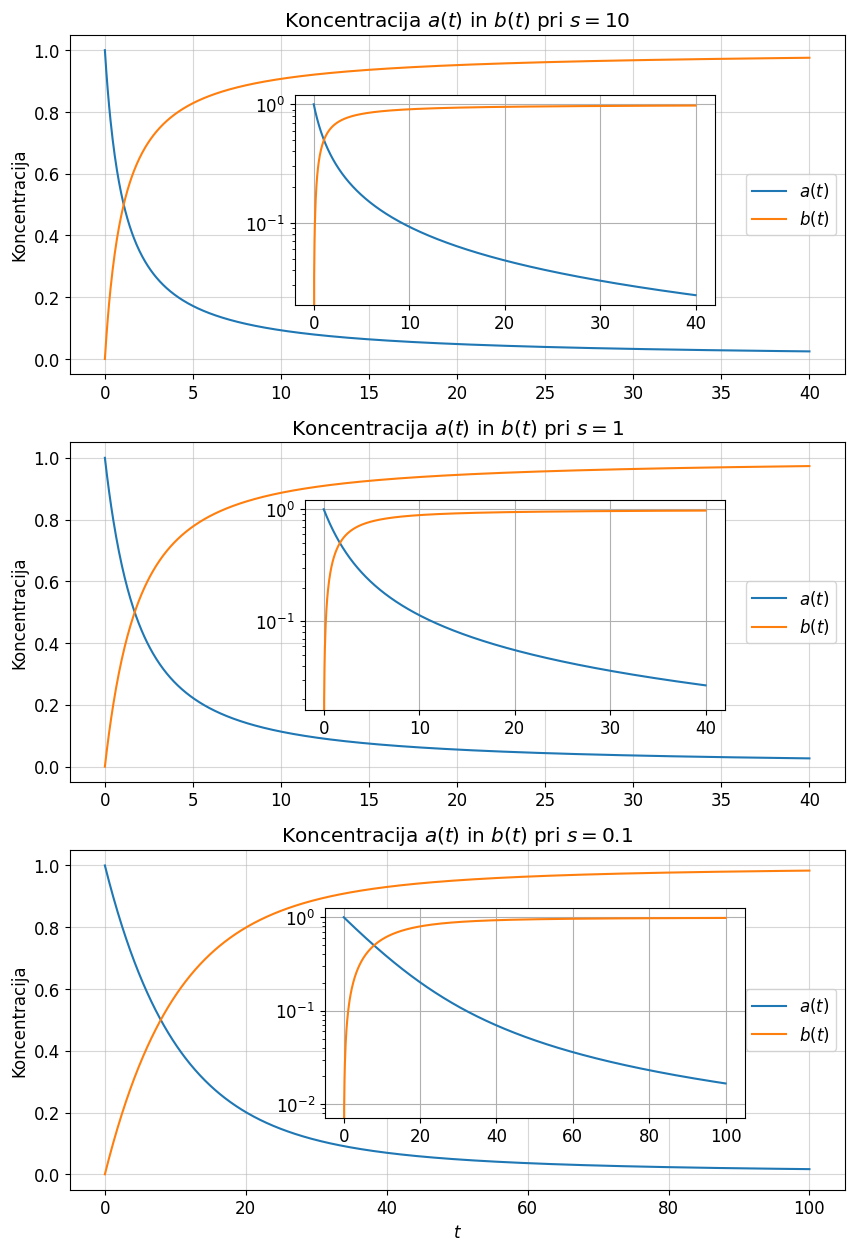

In [6]:
# Plot the solutions
fig = plt.figure(figsize=(10,15))

ax1 = fig.add_subplot(3,1,1)
ax1.grid(alpha=0.5)
ax1.set_title(r'Koncentracija $a(t)$ in $b(t)$ pri $s=10$')
ax1.set_ylabel('Koncentracija')
ax1.plot(ts1, a_solution_stac1, label=r'$a(t)$')
ax1.plot(ts1, b_solution_stac1, label=r'$b(t)$')
ax1.legend()

ax1_inset = fig.add_axes([0.35, 0.70, 0.42, 0.14])  # Adjust the values as needed
ax1_inset.grid()
ax1_inset.set_yscale('log')
ax1_inset.plot(ts1, a_solution_stac1, label=r'$a(t)$')
ax1_inset.plot(ts1, b_solution_stac1, label=r'$b(t)$')


ax2 = fig.add_subplot(3,1,2)
ax2.grid(alpha=0.5)
ax2.set_title(r'Koncentracija $a(t)$ in $b(t)$ pri $s=1$')
ax2.set_ylabel('Koncentracija')
ax2.plot(ts1, a_solution_stac2, label=r'$a(t)$')
ax2.plot(ts1, b_solution_stac2, label=r'$b(t)$')
ax2.legend()

ax2_inset = fig.add_axes([0.36, 0.43, 0.42, 0.14])  # Adjust the values as needed
ax2_inset.grid()
ax2_inset.set_yscale('log')
ax2_inset.plot(ts1, a_solution_stac2, label=r'$a(t)$')
ax2_inset.plot(ts1, b_solution_stac2, label=r'$b(t)$')


ax3 = fig.add_subplot(3,1,3)
ax3.grid(alpha=0.5)
ax3.set_title(r'Koncentracija $a(t)$ in $b(t)$ pri $s=0.1$')
ax3.set_ylabel('Koncentracija')
ax3.set_xlabel(r'$t$')
ax3.plot(ts3, a_solution_stac3, label=r'$a(t)$')
ax3.plot(ts3, b_solution_stac3, label=r'$b(t)$')
ax3.legend()

ax3_inset = fig.add_axes([0.38, 0.158, 0.42, 0.14])  # Adjust the values as needed
ax3_inset.grid()
ax3_inset.set_yscale('log')
ax3_inset.plot(ts3, a_solution_stac3, label=r'$a(t)$')
ax3_inset.plot(ts3, b_solution_stac3, label=r'$b(t)$')

### Primerjava

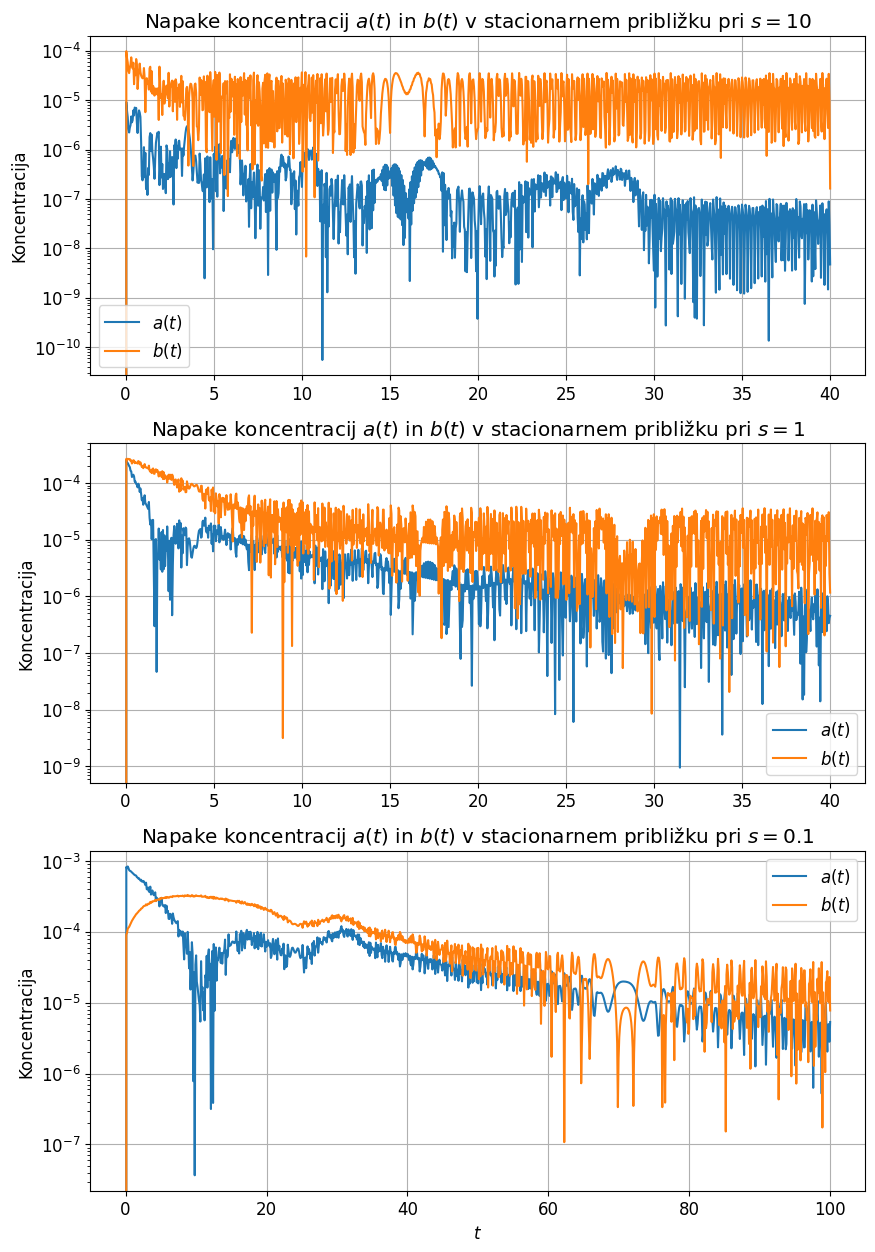

In [7]:
# Plot the solutions
fig = plt.figure(figsize=(10,15))

ax1 = fig.add_subplot(3,1,1)
ax1.grid()
ax1.set_yscale('log')
ax1.set_title(r'Napake koncentracij $a(t)$ in $b(t)$ v stacionarnem približku pri $s=10$')
ax1.set_ylabel('Koncentracija')
ax1.plot(ts1, np.abs(a_solution_stac1 - a_solution1), label=r'$a(t)$')
ax1.plot(ts1, np.abs(b_solution_stac1 - b_solution1), label=r'$b(t)$')
ax1.legend()

ax2 = fig.add_subplot(3,1,2)
ax2.grid()
ax2.set_yscale('log')
ax2.set_title(r'Napake koncentracij $a(t)$ in $b(t)$ v stacionarnem približku pri $s=1$')
ax2.set_ylabel('Koncentracija')
ax2.plot(ts1, np.abs(a_solution_stac2 - a_solution2), label=r'$a(t)$')
ax2.plot(ts1, np.abs(b_solution_stac2 - b_solution2), label=r'$b(t)$')
ax2.legend()

ax3 = fig.add_subplot(3,1,3)
ax3.grid()
ax3.set_yscale('log')
ax3.set_title(r'Napake koncentracij $a(t)$ in $b(t)$ v stacionarnem približku pri $s=0.1$')
ax3.set_ylabel('Koncentracija')
ax3.set_xlabel(r'$t$')
ax3.plot(ts3, np.abs(a_solution_stac3 - a_solution3), label=r'$a(t)$')
ax3.plot(ts3, np.abs(b_solution_stac3 - b_solution3), label=r'$b(t)$')
ax3.legend()

In [8]:
dfq = pd.DataFrame(df)

dfq['Stacionarni približek'] = 1000*dfq['Stacionarni približek']
dfq = dfq.rename({
    'Eksaktna rešitev': 'Čas eksakne rešitve [s]',
    'Stacionarni približek': 'Čas rešitve stacionarnega približka [ms]'
})
print(dfq.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &     s &  Eksaktna rešitev &  Stacionarni približek \\
\midrule
0 &  10.0 &         11.375000 &              11.998892 \\
1 &   1.0 &          1.559000 &               6.010771 \\
2 &   0.1 &          0.758997 &               6.978273 \\
\bottomrule
\end{tabular}



C:\Users\Tadej\AppData\Local\Temp\ipykernel_13988\1629363613.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dfq.to_latex())
